FINAL PROJECT

In [1]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

import numpy as np # handle python arrays
from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

In [2]:
import seaborn as sns # data visualization
from sklearn.preprocessing import OneHotEncoder # encoding catageorical features
from sklearn.model_selection import train_test_split, StratifiedKFold # spliting data
from sklearn.preprocessing import StandardScaler # preprocessing data

In [3]:
import warnings
warnings.filterwarnings("ignore") # ignore warnings

In [4]:
df = pd.read_csv('Customer Conversion Prediction.csv') # Importing the data

DATA CLEANING

In [5]:
df.shape

(45211, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


We can see there are Outliers for the columns age, dur and num_calls. So we have to remove the outliers.

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(45205, 11)

In [11]:
# Checking for the Outliers and removing them
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
upper_threshold = df['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

10.5 70.5


In [12]:
df['age'] = df['age'].clip(lower_threshold, upper_threshold)

In [13]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold = df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['dur'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

-221.0 643.0


In [14]:
df['dur'] = df['dur'].clip(lower_threshold, upper_threshold)

In [15]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

-2.0 6.0


In [16]:
df['num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)

In [17]:
df.replace({"y":{'no':0,'yes':1}},inplace=True)

In [18]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,0


EDA- EXPLORATORY DATA ANALYSIS

In [19]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

We can see there are 288 unkown variables in the Job column which consider as less percentage. So moving forware we impute the unknown values with mode value of the Job Column

<AxesSubplot:xlabel='job', ylabel='count'>

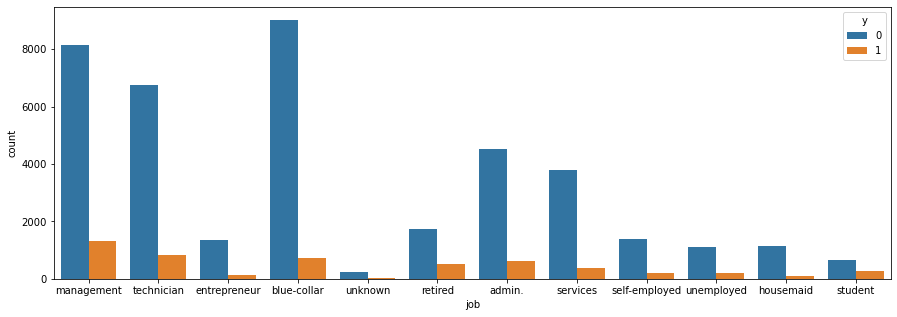

In [20]:
#Job vs Target Variable
plt.figure(figsize=(15, 5))
sns.countplot(x='job',hue='y',data=df)

In [21]:
df["job"].mode()

0    blue-collar
Name: job, dtype: object

In [22]:
df["job"] = df["job"].replace("unknown", "blue-collar")

<AxesSubplot:xlabel='job'>

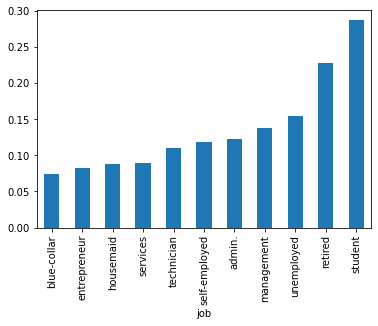

In [23]:
df.groupby('job')['y'].mean().sort_values().plot(kind='bar')

From the above graph we can see that customers whose job is 'student' have maximum conversion rate and customers with job 'bluecollar' have minimum conversion rate.

In [24]:
#Label Encoding
df.replace({"job":{'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,married,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,single,unknown,unknown,5,may,198.0,1.0,unknown,0


In [25]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,married,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,single,unknown,unknown,5,may,198.0,1.0,unknown,0


In [26]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

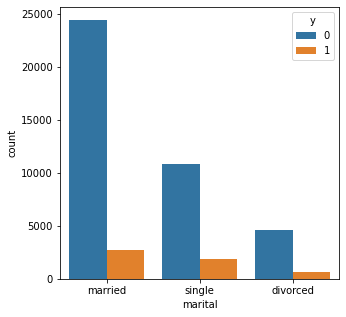

In [27]:
#Job vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='marital',hue='y',data=df)

<AxesSubplot:ylabel='marital'>

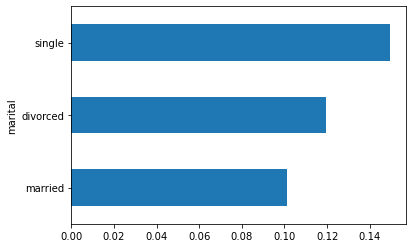

In [28]:
df.groupby('marital')['y'].mean().sort_values().plot(kind='barh')

From the above graph we can see that 'single'customers have maximum conversion rate and 'married' customers have minimum conversion rate.

In [29]:
#Label encoding
df.replace({"marital":{'married':1,'divorced':2,'single':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,1,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,3,unknown,unknown,5,may,198.0,1.0,unknown,0


In [30]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

We can see there are 1857 unkown variables in the Job column which consider as less percentage. So moving forware we impute the unknown values with mode value of the Education Column

<AxesSubplot:xlabel='education_qual', ylabel='count'>

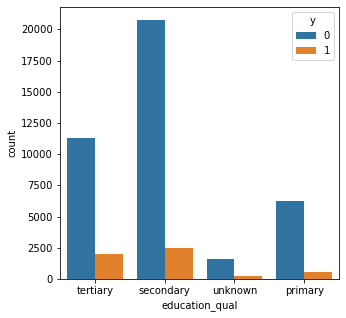

In [31]:
#education_qual vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='education_qual',hue='y',data=df)

In [32]:
df["education_qual"].mode()

0    secondary
Name: education_qual, dtype: object

In [33]:
df["education_qual"] = df["education_qual"].replace("unknown", "secondary")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,1,secondary,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,3,secondary,unknown,5,may,198.0,1.0,unknown,0


<AxesSubplot:ylabel='education_qual'>

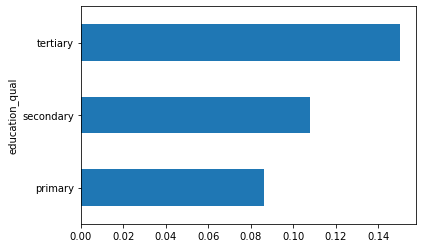

In [34]:
df.groupby('education_qual')['y'].mean().sort_values().plot(kind='barh')

From the above graph we can see that customers whose education is 'tertiary' have maximum conversion rate and customers with 'primary' education have minimum conversion rate.

In [35]:
#Label Encoding
df.replace({"education_qual":{'primary':1,'secondary':2,'tertiary':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,unknown,5,may,261.0,1.0,unknown,0
1,44.0,5,3,2,unknown,5,may,151.0,1.0,unknown,0
2,33.0,2,1,2,unknown,5,may,76.0,1.0,unknown,0
3,47.0,1,1,2,unknown,5,may,92.0,1.0,unknown,0
4,33.0,1,3,2,unknown,5,may,198.0,1.0,unknown,0


In [36]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

We can see there are 13017 unkown variables in the call_type column which are very high in percentage. So data imputing for this doesn't work. so moving we consider the unknown variable as a category itself

<AxesSubplot:xlabel='call_type', ylabel='count'>

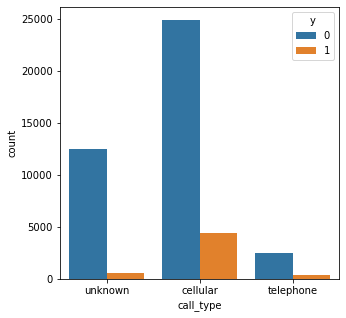

In [37]:
#call_type vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='call_type',hue='y',data=df)

<AxesSubplot:ylabel='call_type'>

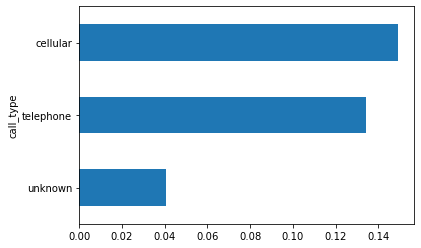

In [38]:
df.groupby('call_type')['y'].mean().sort_values().plot(kind='barh')

From the above graph we can see that customers whose call_type is 'cellular' have maximum conversion rate and customers with call_type 'unknown' have minimum conversion rate.

LABEL ENCODING

In [89]:
df.replace({"call_type":{'unknown':1,'telephone':2,'cellular':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1.0,1,0
1,44.0,5,3,2,1,5,1,151.0,1.0,1,0
2,33.0,2,1,2,1,5,1,76.0,1.0,1,0
3,47.0,1,1,2,1,5,1,92.0,1.0,1,0
4,33.0,1,3,2,1,5,1,198.0,1.0,1,0


In [40]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<AxesSubplot:xlabel='mon', ylabel='count'>

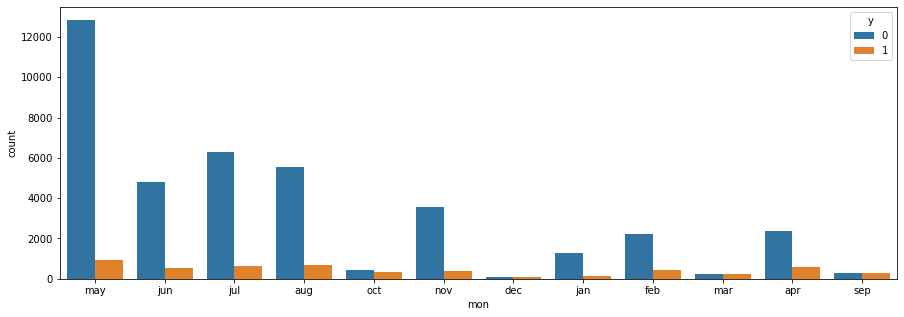

In [41]:
#Month vs Target Variable
plt.figure(figsize=(15, 5))
sns.countplot(x='mon',hue='y',data=df)

<AxesSubplot:ylabel='mon'>

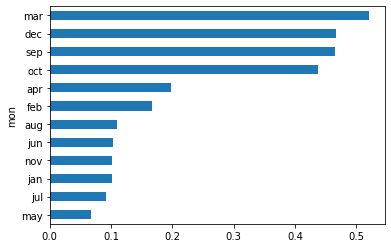

In [42]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='barh')

From the above graph we can see that customers who contacted in  is 'march' have maximum conversion rate and customers who contacted in 'may' have minimum conversion rate.

In [43]:
#Label Encoding for the column mon (Month)
df.replace({"mon":{'may':1,'jul':2,'jan':3,'nov':4,'jun':5,'aug':6,'feb':7,'apr':8,'oct':9,'sep':10,'dec':11,'mar':12}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1.0,unknown,0
1,44.0,5,3,2,1,5,1,151.0,1.0,unknown,0
2,33.0,2,1,2,1,5,1,76.0,1.0,unknown,0
3,47.0,1,1,2,1,5,1,92.0,1.0,unknown,0
4,33.0,1,3,2,1,5,1,198.0,1.0,unknown,0


In [44]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

We can see there are 36953 unkown variables in the prev_outcome column which are very high in percentage. So data imputing for this doesn't work. so moving we consider the unknown variable as a category itself

<AxesSubplot:xlabel='prev_outcome', ylabel='count'>

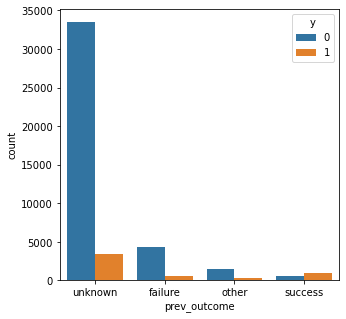

In [45]:
#prev_outcome vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='prev_outcome',hue='y',data=df)

<AxesSubplot:ylabel='prev_outcome'>

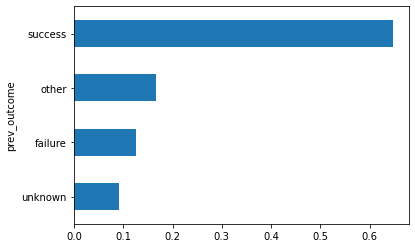

In [46]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot(kind='barh')

From the above graph we can see that customers whose previous outcome is 'sucess' have maximum conversion rate and customers with previous outcome unknown have minimum conversion rate.

In [47]:
#Label Encoding
df.replace({"prev_outcome":{'unknown':1,'failure':2,'other':3,'success':4}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261.0,1.0,1,0
1,44.0,5,3,2,1,5,1,151.0,1.0,1,0
2,33.0,2,1,2,1,5,1,76.0,1.0,1,0
3,47.0,1,1,2,1,5,1,92.0,1.0,1,0
4,33.0,1,3,2,1,5,1,198.0,1.0,1,0


Splitting the Data

In [52]:
# Separating the Feature and Target
X = df.drop(columns=['y'],axis=1)
Y = df['y']

In [53]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

Balancing the data

In [54]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train, Y_train = smt.fit_resample(X_train, Y_train)

I tried all the approaches to balance the data, Like Random Oversampling, Randing Undersampling, Cluster Centeriods and also also SMOTE. But SOMTEENN Giving the Best AUROC Score out of all other approaches. So the Choose the SMOTEENN for Balancing my data

In [55]:
print(X_train.shape,Y_train.shape)

(55006, 10) (55006,)


In [56]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [58]:
from sklearn.metrics import roc_auc_score
Y_pred = log_reg.predict_proba(X_test)[:, 1]
log_auroc = roc_auc_score(Y_test, Y_pred)
print("AUROC score: %.2f%%" % (log_auroc * 100.0))

AUROC score: 88.41%


KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.790067470412565

In [90]:
for i in [1,3,4,6,7,8,9,10,20,30]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    print("K value  : " , i, " train score : ", knn.score(X_train, Y_train) , " Cross-Val score : ", np.mean(cross_val_score(knn, X_train,Y_train, cv=10, scoring = "roc_auc")))

K value  :  1  train score :  1.0  Cross-Val score :  0.9390582533334115
K value  :  3  train score :  0.965240155619387  Cross-Val score :  0.963230695393063
K value  :  4  train score :  0.9614405701196234  Cross-Val score :  0.967288159856747
K value  :  6  train score :  0.9500236337854052  Cross-Val score :  0.9704146095618658
K value  :  7  train score :  0.9436425117259936  Cross-Val score :  0.9705756606036424
K value  :  8  train score :  0.9426971603097843  Cross-Val score :  0.9709246942002302
K value  :  9  train score :  0.9374431880158528  Cross-Val score :  0.9714098426310771
K value  :  10  train score :  0.9364796567647166  Cross-Val score :  0.9714737062803094
K value  :  20  train score :  0.9227538813947569  Cross-Val score :  0.970427585776234
K value  :  30  train score :  0.9172090317419918  Cross-Val score :  0.9688165753340551


For k=10 cross validation score is maximum.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
from sklearn.metrics import roc_auc_score
Y_pred = log_reg.predict_proba(X_test)[:, 1]
knn_auroc = roc_auc_score(Y_test, Y_pred)
print("AUROC score: %.2f%%" % (knn_auroc * 100.0))

AUROC score: 88.41%


Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [64]:
from sklearn.metrics import roc_auc_score
Y_pred = dt.predict(X_test)
Y_pred
acc = roc_auc_score(Y_test,Y_pred)
print("AUROC score: %.2f%%" % (acc * 100.0))

AUROC score: 79.71%


In [65]:
from sklearn.model_selection import cross_val_score
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, Y_train)
    print("Depth  : " , depth, " train score : ", dt.score(X_train, Y_train) , " Cross-Val score : ", np.mean(cross_val_score(dt, X_train,Y_train, cv=10, scoring = "roc_auc")))

Depth  :  1  train score :  0.784096280405774  Cross-Val score :  0.7767880187603421
Depth  :  2  train score :  0.8013489437515907  Cross-Val score :  0.8593551092673181
Depth  :  3  train score :  0.8569792386285132  Cross-Val score :  0.8988947594083943
Depth  :  4  train score :  0.8669054284987092  Cross-Val score :  0.9266625056117679
Depth  :  5  train score :  0.8836854161364215  Cross-Val score :  0.9407925071506187
Depth  :  6  train score :  0.89021197687525  Cross-Val score :  0.9494646217324421
Depth  :  7  train score :  0.8974475511762353  Cross-Val score :  0.9560624724770156
Depth  :  8  train score :  0.9139548412900411  Cross-Val score :  0.9626957258664779
Depth  :  9  train score :  0.9254444969639676  Cross-Val score :  0.9664407442253438
Depth  :  10  train score :  0.9334799840017453  Cross-Val score :  0.9680811218099175
Depth  :  20  train score :  0.9977093407991855  Cross-Val score :  0.9499875020575843


In [66]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=10)
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [68]:
from sklearn.metrics import roc_auc_score
Y_pred = model_dt.predict(X_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [72]:
dt_auroc = roc_auc_score(Y_test, Y_pred)
print("AUROC score: %.2f%%" % (dt_auroc * 100.0))

AUROC score: 81.74%


RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, random_state=2)
model_rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [75]:
from sklearn.metrics import roc_auc_score
Y_pred = model_rfc.predict(X_test)
Y_pred
rfc_auroc = roc_auc_score(Y_test, Y_pred)
print("AUROC score: %.2f%%" % (rfc_auroc * 100.0))

AUROC score: 83.30%


XGBoost Classifier

In [81]:
import sys
!{sys.executable} -m pip install xgboost

In [82]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.5,0.75,1]:
  model = xgb.XGBClassifier(objective="binary:logistic", learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train,Y_train)
  model.score(X_test, Y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")))

Learning rate :  0.01  Train score :  0.9154455877540632  Cross-Val score :  0.969001311949446
Learning rate :  0.03  Train score :  0.9384976184416246  Cross-Val score :  0.9823756453821787
Learning rate :  0.05  Train score :  0.95218703414173  Cross-Val score :  0.9885363352508995
Learning rate :  0.07  Train score :  0.9598589244809657  Cross-Val score :  0.9912989886579873
Learning rate :  0.09  Train score :  0.9643311638730321  Cross-Val score :  0.9928520320205202
Learning rate :  0.1  Train score :  0.9670217794422427  Cross-Val score :  0.9934179085291708
Learning rate :  0.2  Train score :  0.9801839799294623  Cross-Val score :  0.9960022835274295
Learning rate :  0.5  Train score :  0.9936370577755154  Cross-Val score :  0.9966890833056065
Learning rate :  0.75  Train score :  0.9971639457513726  Cross-Val score :  0.996518191628035
Learning rate :  1  Train score :  0.9995091444569684  Cross-Val score :  0.9962011360962784


In [83]:
import xgboost as xgb
classifier = xgb.XGBClassifier(objective="binary:logistic", learning_rate = 0.3, n_estimators=100, verbosity = 0)
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
from sklearn.metrics import roc_auc_score
Y_pred = classifier.predict_proba(X_test)[:, 1]
XGB_auroc = roc_auc_score(Y_test, Y_pred)
print("AUROC score: %.2f%%" % (XGB_auroc * 100.0))

AUROC score: 91.61%


In [85]:
pd.DataFrame({"Model":["Logistic Regression", "KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", "XGBoost Classifier"], "AUROC":[log_auroc, knn_auroc, dt_auroc, rfc_auroc, XGB_auroc]})

,Model,AUROC
0,Logistic Regression,0.884144
1,KNN Classifier,0.884144
2,Decision Tree Classifier,0.817426
3,Random Forest Classifier,0.833021
4,XGBoost Classifier,0.916131


 Out of all Classification models the XGBoost Classifier got the higher AUROC Value. So We can use XGBoost Classifier as Machine Learning Model.

Feature Importance

In [86]:
# Get feature importance scores
importances = classifier.feature_importances_
feature_names = X.columns

# Print the feature importance scores
for i, importance in enumerate(importances):
    print("{}: {}".format(feature_names[i], importance))

age: 0.03310475870966911
job: 0.042848873883485794
marital: 0.018054533749818802
education_qual: 0.012262829579412937
call_type: 0.2971251606941223
day: 0.0351518876850605
mon: 0.1309577375650406
dur: 0.1738801896572113
num_calls: 0.13730739057064056
prev_outcome: 0.11930666863918304


Text(0.5, 0, 'Xgboost Feature Importance')

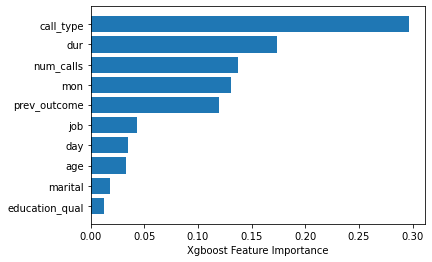

In [87]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

From above graph we can see that call_type is with higher importance and educational qualification has minimum importance in predicting customer conversion rate.